In [47]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)


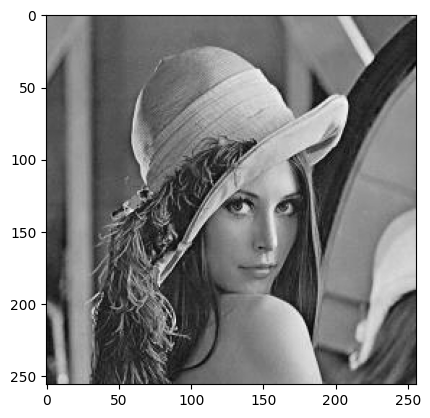

In [48]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/lena256.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gImg, cmap='gray')

로버츠 검출기

In [49]:
gx = np.array([[-1, 0], [0,1]],dtype=int)
gy = np.array([[0, -1], [1,0]],dtype=int)

In [ ]:
gx = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]],dtype=int)
gy = np.array([[0, 0, -1], [0, 1, 0], [0, 0, 0]],dtype=int)

소벨 검출기

In [64]:
gx = np.array([[-1, 0, 0], [-2, 0, 2], [-1, 0, 1]],dtype=int)
gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]],dtype=int)

프리윗 검출기

In [77]:
gx = np.array([[-1, 0, 0], [-1, 0, 1], [-1, 0, 1]],dtype=int)
gy = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]],dtype=int)

에지 검출

In [82]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [83]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

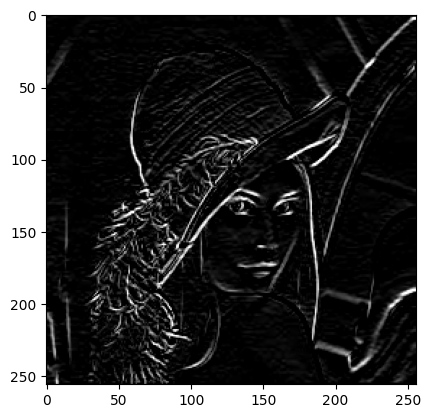

In [84]:
outImg = cv2.addWeighted(absX, 1, absY, 1, 0)
plt.imshow(outImg, cmap='gray')
#cv2_imshow(outImg)

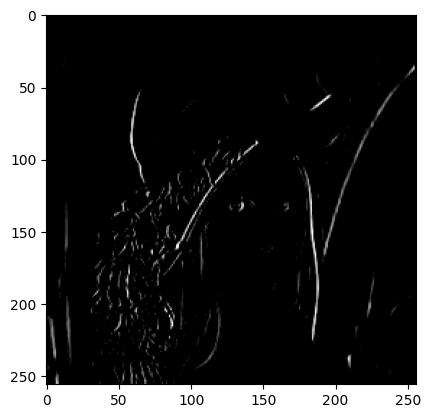

In [85]:
plt.imshow(absX, cmap='gray')

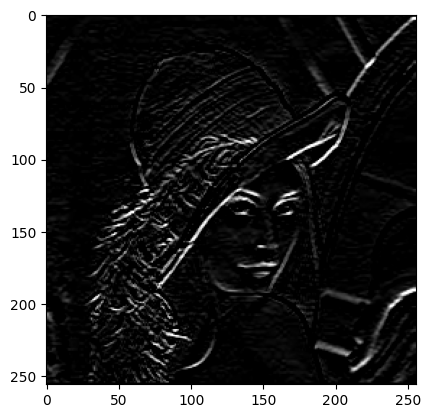

In [86]:
plt.imshow(absY, cmap='gray')

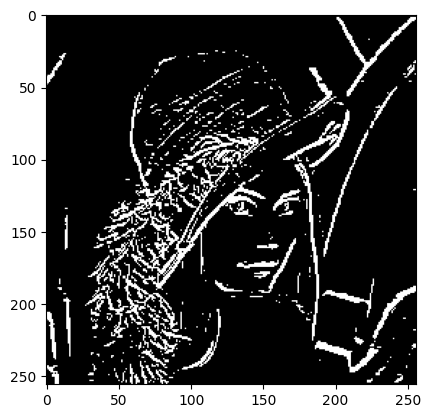

In [90]:
gBin = np.zeros(gImg.shape, dtype=int)

threshold = 40

for i in range(gImg.shape[0]):
  for j in range(gImg.shape[1]):
    if outImg[i,j] > threshold:
      gBin[i,j] = 255

plt.imshow(gBin, cmap='gray')

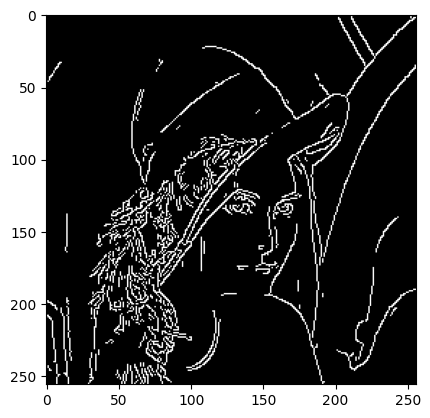

In [95]:
outImg = cv2.Canny(gImg, 200, 250)
plt.imshow(outImg, cmap='gray')